In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import model_selection
from sklearn import neighbors, metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import preprocessing

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


#On importe les donnes
B = pd.read_csv('46var.csv', delimiter= ',',header=0)

In [2]:
B.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
print(B)

       cle  mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0        0        6          0      0              3            5          0   
1        1        0          0      2              4            2          0   
2        2        6          0      2              4            2          0   
3        3        6          0      0              4            2          0   
4        4        0          0      0              3            6          0   
...    ...      ...        ...    ...            ...          ...        ...   
5817  5817        6          0      2              3            3          0   
5818  5818        0          0      0              5            5          0   
5819  5819        6          0      2              3            4          0   
5820  5820        6          0      0              6            0          0   
5821  5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_e

In [3]:
varexpliquee = B['assur_caravane']

In [4]:
#Preparation
C = B.copy()

X_knn = C[C.columns[1:-1]]
#print(X_knn)

#Créer le vecteur d'étiquettes
y_knn = C['assur_caravane']
#print(y_knn)

#Over / Under sampling

#Resultat incroyable
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_knn, y_knn)

#print(X_resampled)
#print(y_resampled)

#Separation en table entrainement et test
X_train, x_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.25)

# Optimisation du paramètre de complexité k

# Grille de valeurs

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10, 11, 13, 15]}

# Choix du score à optimiser
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_knn = GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_knn.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_knn.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_knn.cv_results_['mean_test_score'], # score moyen
        clf_knn.cv_results_['std_test_score'],  # écart-type du score
        clf_knn.cv_results_['params']           # valeur de l'hyperparamètre
    ):
    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score,mean,std*2,params))

# Meilleur choix de l'hyperparmetre k : 2

#Mesure de performance (avec k = 2)

# Prévision de l'échantillon test
pred = clf_knn.predict(x_test)

# Precision
print("\n precision")
print(precision_score(y_test,pred))

# Rappel
print("\n rappel")
print(recall_score(y_test,pred))

# F1 score
print("\n score f1")
print(f1_score(y_test,pred))

# Matrice de confusion
print(confusion_matrix(y_test,pred))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 2}
Résultats de la validation croisée :
accuracy = 0.988 (+/-0.009) for {'n_neighbors': 1}
accuracy = 0.988 (+/-0.008) for {'n_neighbors': 2}
accuracy = 0.964 (+/-0.006) for {'n_neighbors': 3}
accuracy = 0.967 (+/-0.006) for {'n_neighbors': 4}
accuracy = 0.933 (+/-0.004) for {'n_neighbors': 5}
accuracy = 0.941 (+/-0.005) for {'n_neighbors': 6}
accuracy = 0.911 (+/-0.009) for {'n_neighbors': 7}
accuracy = 0.920 (+/-0.011) for {'n_neighbors': 8}
accuracy = 0.894 (+/-0.011) for {'n_neighbors': 9}
accuracy = 0.905 (+/-0.011) for {'n_neighbors': 10}
accuracy = 0.875 (+/-0.020) for {'n_neighbors': 11}
accuracy = 0.861 (+/-0.020) for {'n_neighbors': 13}
accuracy = 0.846 (+/-0.017) for {'n_neighbors': 15}

 precision
0.9758490566037736

 rappel
1.0

 score f1
0.9877769289533995
[[1032   32]
 [   0 1293]]


In [5]:
#Retraitement des variables

#Seulement celle ayant de mauvaises queues de distribution

#print(B)
X = B[B.columns[1:-1]]
print(X.columns)

#Créer le vecteur d'étiquette
y = B['assur_caravane']

X_new = X.values
print(X_new)

Index(['mt_auto', 'nb_bateau', 'mt_RC', 'pouvoir_achat', 'mt_incendie',
       'mt_bateau', 'niv_etud_bas', 'revenu_moyen', 'niv_etude_haut',
       'revenu1', 'proprietaire', 'auto0', 'auto1', 'type_client',
       'nb_securite_soc', 'PCStop', 'revenu4', 'revenu3', 'assur_sante_prive',
       'PCSouvr', 'PCSagri', 'celibataire', 'PCSinter', 'mt_cyclomoteur',
       'PCSouvr_quali', 'sans_religion', 'nbpers_au_foyer',
       'nb_accident_famil', 'concubin', 'mt_velo', 'nb_invalidite', 'PCScadre',
       'nb_RC_agri', 'mt_assur_vie', 'nb_MRH', 'mt_remorque', 'mt_tracteur',
       'nbmaisons', 'sans_enfant', 'auto2', 'catholique', 'mt_moto',
       'autre_religion', 'revenu5', 'revenu2', 'nb_RC_entreprise'],
      dtype='object')
[[6 0 0 ... 0 4 0]
 [0 0 2 ... 0 0 0]
 [6 0 2 ... 0 5 0]
 ...
 [6 0 2 ... 0 3 0]
 [6 0 0 ... 0 5 0]
 [0 0 1 ... 0 5 0]]


0    2845
6    2319
5     613
7      41
8       3
4       1
Name: mt_auto, dtype: int64
[2 0 2 ... 2 2 0]
0    2845
2    2363
1     614
Name: mt_auto, dtype: int64


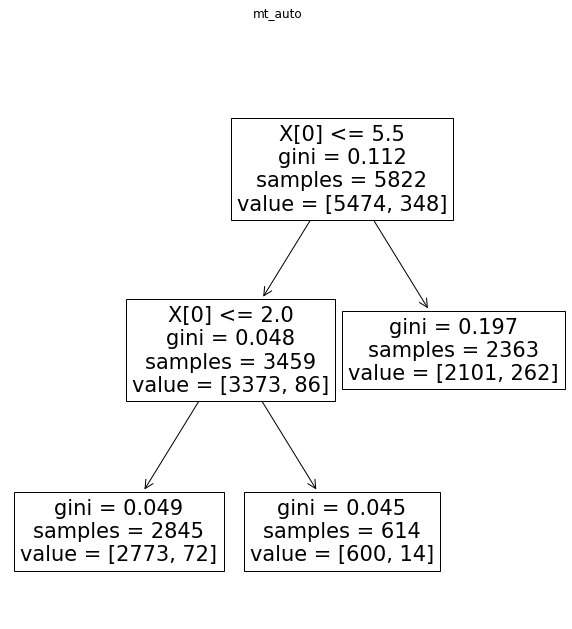

In [6]:
#mt_auto

print(X['mt_auto'].value_counts())

arbre_cla_mta=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mta.fit(X_new[:,0].reshape(X_new.shape[0],1),varexpliquee)
mt_at=np.repeat(-1,X_new.shape[0])
mt_at[X_new[:,0]<=2.0]=0
mt_at[(X_new[:,0]>2.0) & (X_new[:,0]<=5.5)]=1
mt_at[(X_new[:,0]>5.5)]=2

print(mt_at)

for i in range(0,5822):
     X.at[i,'mt_auto'] = mt_at[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[0])
plot_tree(arbre_cla_mta) 

print(X['mt_auto'].value_counts())

0    5789
1      31
2       2
Name: nb_bateau, dtype: int64
[0 0 0 ... 0 0 0]
0    5789
1      33
Name: nb_bateau, dtype: int64


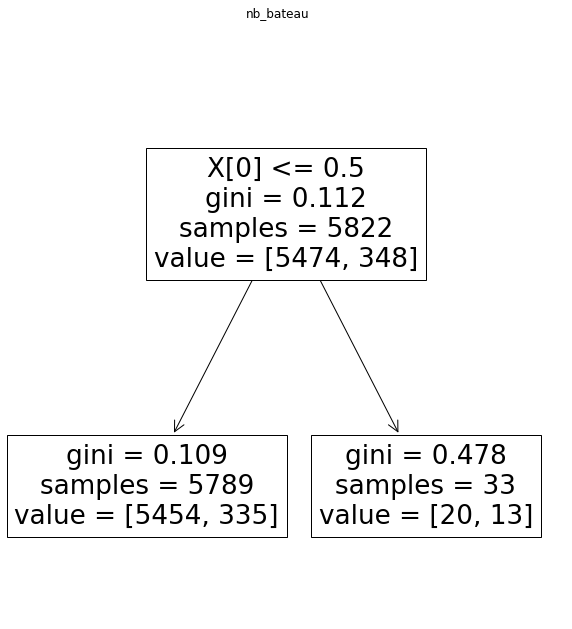

In [7]:
#nb_bateau

print(X['nb_bateau'].value_counts())

arbre_cla_nbb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_nbb.fit(X_new[:,1].reshape(X_new.shape[0],1),varexpliquee)
nb_b=np.repeat(-1,X_new.shape[0])
nb_b[X_new[:,1]<=0.5]=0
nb_b[(X_new[:,1]>0.5)] = 1

print(nb_b)

for i in range(0,5822):
    X.at[i,'nb_bateau'] = nb_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[1])
plot_tree(arbre_cla_nbb) 

print(X['nb_bateau'].value_counts())

0    3482
2    2128
1     201
3      11
Name: mt_RC, dtype: int64
[0 2 2 ... 2 0 1]
0    3482
2    2139
1     201
Name: mt_RC, dtype: int64


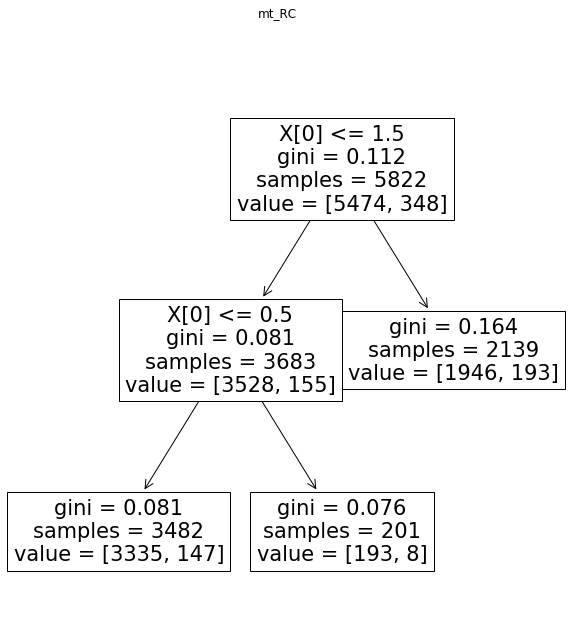

In [8]:
#mt_RC

print(X['mt_RC'].value_counts())

arbre_cla_mtrc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtrc.fit(X_new[:,2].reshape(X_new.shape[0],1),varexpliquee)
mt_rc=np.repeat(-1,X_new.shape[0])
mt_rc[X_new[:,2]<=0.5]=0
mt_rc[(X_new[:,2]>0.5) & (X_new[:,2]<=1.5)]=1
mt_rc[(X_new[:,2]>1.5)]=2

print(mt_rc)

for i in range(0,5822):
    X.at[i,'mt_RC'] = mt_rc[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[2])
plot_tree(arbre_cla_mtrc) 

print(X['mt_RC'].value_counts())

0    2666
4    1226
3     920
2     535
1     161
6     155
5     149
7       9
8       1
Name: mt_incendie, dtype: int64
[3 1 1 ... 2 0 0]
0    2666
2    2146
1     696
3     314
Name: mt_incendie, dtype: int64


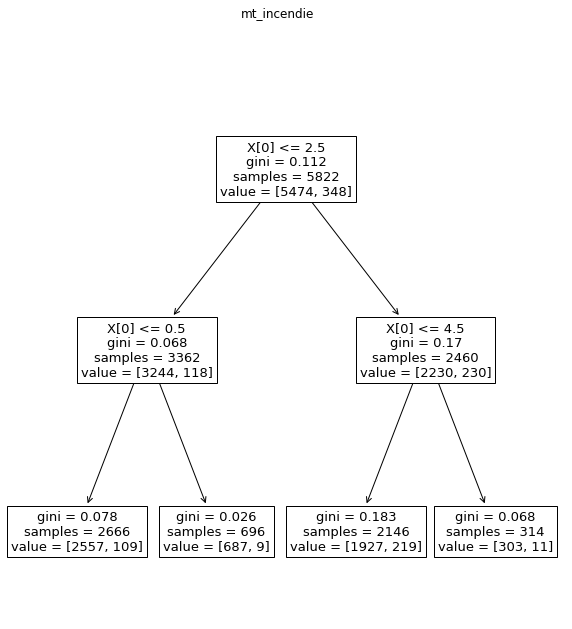

In [9]:
#mt_incendie

print(X['mt_incendie'].value_counts())

arbre_cla_mtinc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtinc.fit(X_new[:,4].reshape(X_new.shape[0],1),varexpliquee)
mt_in=np.repeat(-1,X_new.shape[0])
mt_in[X_new[:,4]<=0.5]=0
mt_in[(X_new[:,4]>0.5) & (X_new[:,4]<=2.5)]=1
mt_in[(X_new[:,4]>2.5) & (X_new[:,4]<=4.5)]=2
mt_in[(X_new[:,4]>4.5)]=3

print(mt_in)

for i in range(0,5822):
    X.at[i,'mt_incendie'] = mt_in[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[4])
plot_tree(arbre_cla_mtinc) 

print(X['mt_incendie'].value_counts())

0    5789
4      13
3       5
2       5
1       5
6       3
5       2
Name: mt_bateau, dtype: int64
[0 0 0 ... 0 0 0]
0    5789
1      33
Name: mt_bateau, dtype: int64


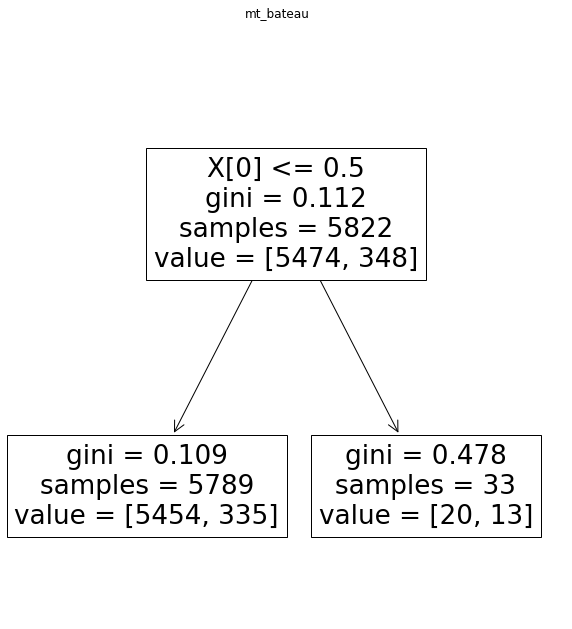

In [10]:
#mt_bateau

print(X['mt_bateau'].value_counts())

arbre_cla_mtb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_mtb.fit(X_new[:,5].reshape(X_new.shape[0],1),varexpliquee)
mt_b=np.repeat(-1,X_new.shape[0])
mt_b[X_new[:,5]<=0.5]=0
mt_b[(X_new[:,5]>0.5)]=1

print(mt_b)

for i in range(0,5822):
    X.at[i,'mt_bateau'] = mt_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[5])
plot_tree(arbre_cla_mtb) 

print(X['mt_bateau'].value_counts())

3    1932
4    1854
5     733
2     651
6     355
7     131
8      70
1      49
0      25
9      22
Name: revenu_moyen, dtype: int64
[2 2 1 ... 1 2 1]
2    2942
1    1932
0     725
3     223
Name: revenu_moyen, dtype: int64


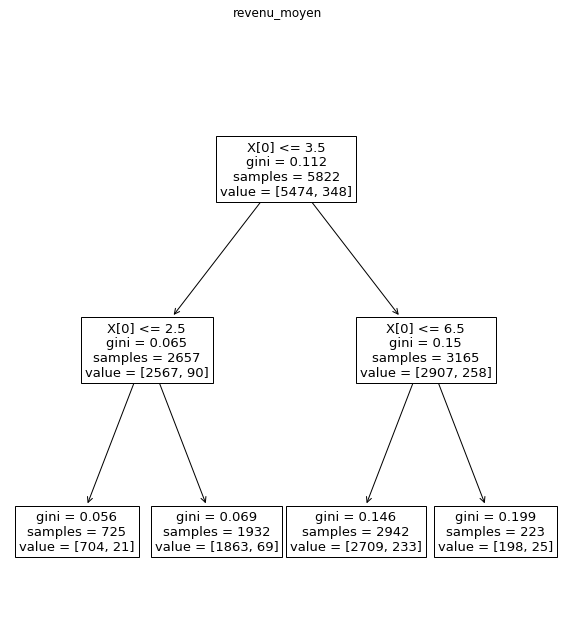

In [11]:
#revenu_moyen

print(X['revenu_moyen'].value_counts())

arbre_cla_rm=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_rm.fit(X_new[:,7].reshape(X_new.shape[0],1),varexpliquee)
rev_moy=np.repeat(-1,X_new.shape[0])
rev_moy[X_new[:,7]<=2.5]=0
rev_moy[(X_new[:,7]>2.5) & (X_new[:,7]<=3.5)]=1
rev_moy[(X_new[:,7]>3.5) & (X_new[:,7]<=6.5)]=2
rev_moy[(X_new[:,7]>6.5)]=3

print(rev_moy)

for i in range(0,5822):
    X.at[i,'revenu_moyen'] = rev_moy[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[7])
plot_tree(arbre_cla_rm) 

print(X['revenu_moyen'].value_counts())

0    2147
1    1322
2    1144
3     547
4     326
5     187
6      67
7      51
8      22
9       9
Name: niv_etude_haut, dtype: int64
[1 0 0 ... 0 0 1]
1    3013
0    2147
2     513
3     149
Name: niv_etude_haut, dtype: int64


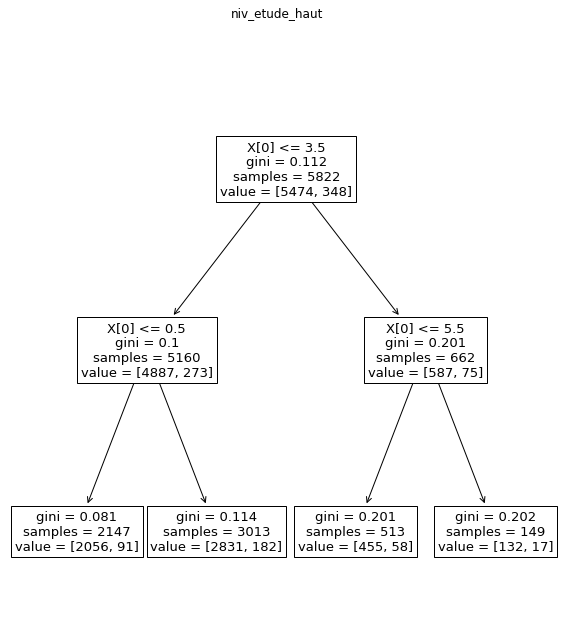

In [12]:
#niv_etude_haut

print(X['niv_etude_haut'].value_counts())

arbre_cla_neh=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_neh.fit(X_new[:,8].reshape(X_new.shape[0],1),varexpliquee)
neh=np.repeat(-1,X_new.shape[0])
neh[X_new[:,8]<=0.5]=0
neh[(X_new[:,8]>0.5) & (X_new[:,8]<=3.5)]=1
neh[(X_new[:,8]>3.5) & (X_new[:,8]<=5.5)]=2
neh[(X_new[:,8]>5.5)]=3

print(neh)

for i in range(0,5822):
    X.at[i,'niv_etude_haut'] = neh[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[8])
plot_tree(arbre_cla_neh) 

print(X['niv_etude_haut'].value_counts())

0    1304
2    1094
3    1079
1     630
4     599
5     568
6     293
7     156
9      51
8      48
Name: revenu1, dtype: int64
[0 1 3 ... 3 0 1]
1    1724
3    1715
0    1304
2    1079
Name: revenu1, dtype: int64


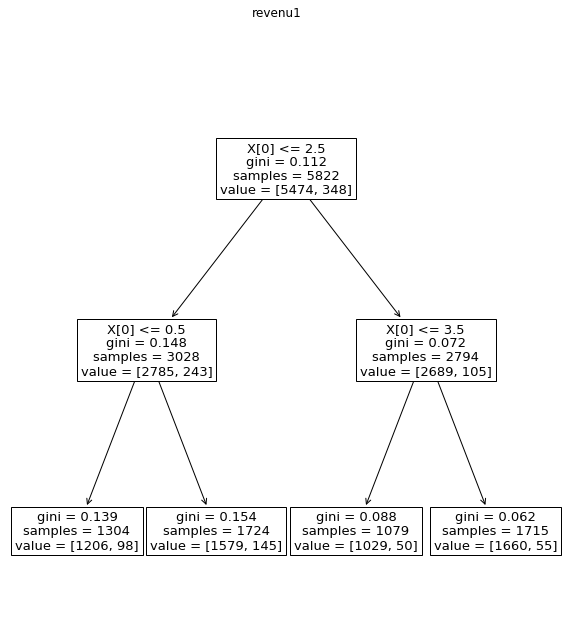

In [13]:
#revenu1

print(X['revenu1'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_r1.fit(X_new[:,9].reshape(X_new.shape[0],1),varexpliquee)
rev_1=np.repeat(-1,X_new.shape[0])
rev_1[X_new[:,9]<=0.5]=0
rev_1[(X_new[:,9]>0.5) & (X_new[:,9]<=2.5)]=1
rev_1[(X_new[:,9]>2.5) & (X_new[:,9]<=3.5)]=2
rev_1[(X_new[:,9]>3.5)]=3

print(rev_1)

for i in range(0,5822):
    X.at[i,'revenu1'] = rev_1[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[9])
plot_tree(arbre_cla_r1) 

print(X['revenu1'].value_counts())

2    1625
0    1450
3    1066
1     776
4     587
5     174
6      89
7      25
9      17
8      13
Name: auto0, dtype: int64
[1 1 1 ... 3 0 2]
1    2401
0    1450
2    1066
3     905
Name: auto0, dtype: int64


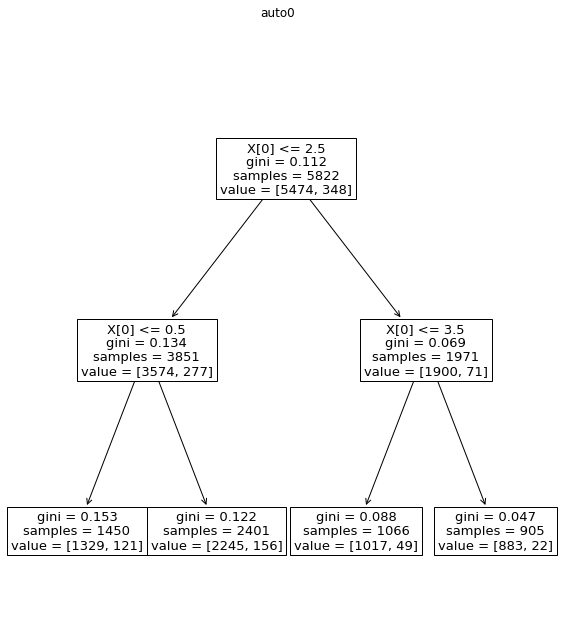

In [14]:
#auto0

print(X['auto0'].value_counts())

arbre_cla_auto0=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_auto0.fit(X_new[:,11].reshape(X_new.shape[0],1),varexpliquee)
auto0_cla=np.repeat(-1,X_new.shape[0])
auto0_cla[X_new[:,11]<=0.5]=0
auto0_cla[(X_new[:,11]>0.5) & (X_new[:,11]<=2.5)]=1
auto0_cla[(X_new[:,11]>2.5) & (X_new[:,11]<=3.5)]=2
auto0_cla[X_new[:,11]>3.5]=3

print(auto0_cla)


for i in range(0,5822):
    X.at[i,'auto0'] = auto0_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[11])
plot_tree(arbre_cla_auto0) 

print(X['auto0'].value_counts())

6    1663
7    1413
5    1210
9     505
4     448
8     261
3     231
2      58
0      19
1      14
Name: auto1, dtype: int64
[2 2 2 ... 2 2 2]
2    4995
3     505
1     289
0      33
Name: auto1, dtype: int64


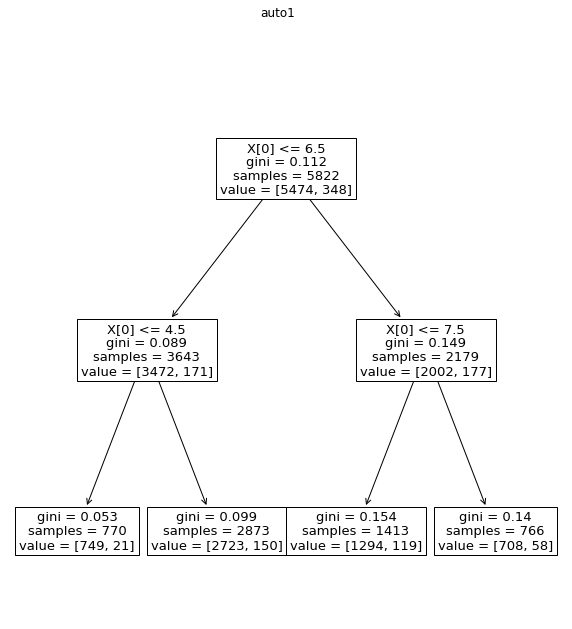

In [15]:
#auto1

print(X['auto1'].value_counts())

arbre_cla_auto1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_auto1.fit(X_new[:,12].reshape(X_new.shape[0],1),varexpliquee)
auto1_cla=np.repeat(-1,X_new.shape[0])
auto1_cla[X_new[:,12]<=1.5]=0
auto1_cla[(X_new[:,12]>1.5) & (X_new[:,12]<=3.5)]=1
auto1_cla[(X_new[:,12]>3.5) & (X_new[:,12]<=8.5)]=2
auto1_cla[X_new[:,12]>8.5]=3

print(auto1_cla)


for i in range(0,5822):
    X.at[i,'auto1'] = auto1_cla[i]
    
#print(B['PCSagri'])
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[12])
plot_tree(arbre_cla_auto1) 

print(X['auto1'].value_counts())

0    1524
2    1364
1    1245
3     756
4     397
5     249
6     138
7      92
9      31
8      26
Name: PCStop, dtype: int64
[0 0 0 ... 0 0 0]
0    4133
1    1402
2     256
3      31
Name: PCStop, dtype: int64


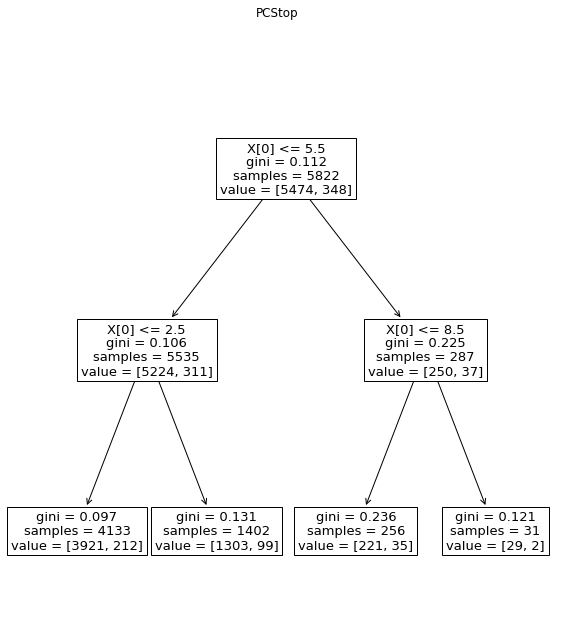

In [16]:
#PCStop

print(X['PCStop'].value_counts())

arbre_cla_PCStop=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_PCStop.fit(X_new[:,15].reshape(X_new.shape[0],1),varexpliquee)
PCStop_cla=np.repeat(-1,X_new.shape[0])
PCStop_cla[X_new[:,15]<=2.5]=0
PCStop_cla[(X_new[:,15]>2.5) & (X_new[:,15]<=5.5)]=1
PCStop_cla[(X_new[:,15]>5.5) & (X_new[:,15]<=8.5)]=2
PCStop_cla[X_new[:,15]>8.5]=3

print(PCStop_cla)


for i in range(0,5822):
    X.at[i,'PCStop'] = PCStop_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[15])
plot_tree(arbre_cla_PCStop) 

print(X['PCStop'].value_counts())

0    3246
1    1359
2     736
3     246
4     147
5      71
6       8
9       4
8       4
7       1
Name: revenu4, dtype: int64
[0 1 0 ... 1 0 1]
0    3246
1    2341
2     235
Name: revenu4, dtype: int64


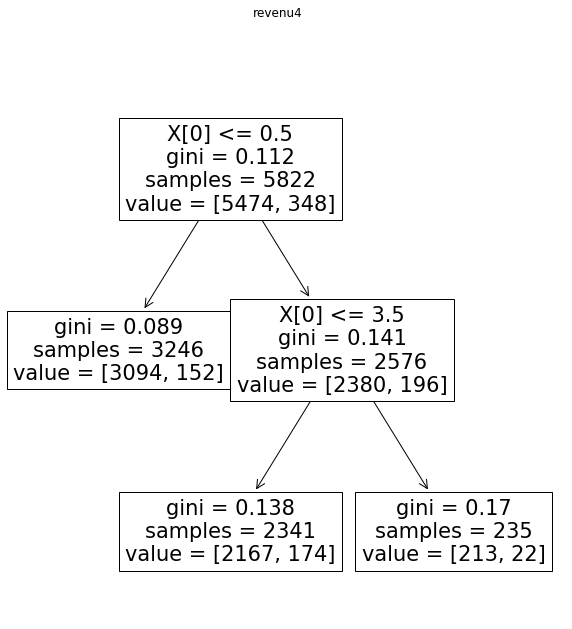

In [17]:
#revenu4

print(X['revenu4'].value_counts())

arbre_cla_revenu4=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_revenu4.fit(X_new[:,16].reshape(X_new.shape[0],1),varexpliquee)
revenu4_cla=np.repeat(-1,X_new.shape[0])
revenu4_cla[X_new[:,16]<=0.5]=0
revenu4_cla[(X_new[:,16]>0.5) & (X_new[:,16]<=3.5)]=1
revenu4_cla[X_new[:,16]>3.5]=2

print(revenu4_cla)


for i in range(0,5822):
    X.at[i,'revenu4'] = revenu4_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[16])
plot_tree(arbre_cla_revenu4) 

print(X['revenu4'].value_counts())

3    1215
2    1165
4    1034
0     891
1     657
5     498
6     125
7      93
9      91
8      53
Name: revenu3, dtype: int64
[2 2 0 ... 1 2 1]
1    3037
2    1894
0     891
Name: revenu3, dtype: int64


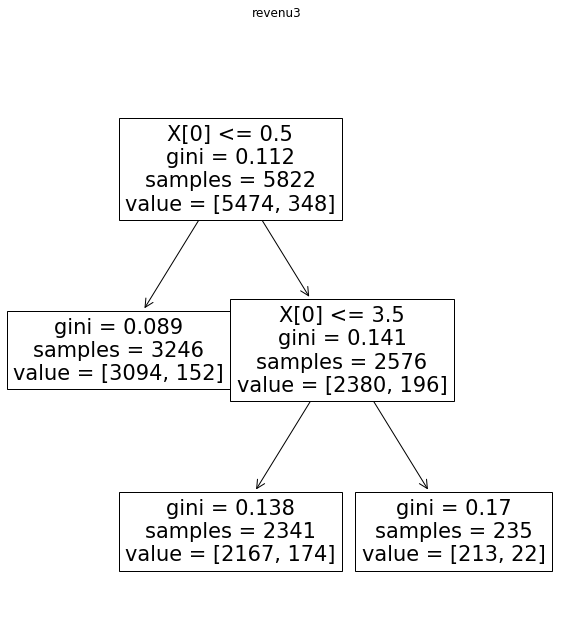

In [18]:
#revenu3

print(X['revenu3'].value_counts())

arbre_cla_revenu3=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_revenu3.fit(X_new[:,17].reshape(X_new.shape[0],1),varexpliquee)
revenu3_cla=np.repeat(-1,X_new.shape[0])
revenu3_cla[X_new[:,17]<=0.5]=0
revenu3_cla[(X_new[:,17]>0.5) & (X_new[:,17]<=3.5)]=1
revenu3_cla[X_new[:,17]>3.5]=2

print(revenu3_cla)


for i in range(0,5822):
    X.at[i,'revenu3'] = revenu3_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[17])
plot_tree(arbre_cla_revenu4) 

print(X['revenu3'].value_counts())

2    1511
4     992
0     852
3     849
1     699
5     364
7     307
6     178
9      55
8      15
Name: assur_sante_prive, dtype: int64
[0 1 0 ... 0 0 1]
1    2360
2    1856
0    1551
3      55
Name: assur_sante_prive, dtype: int64


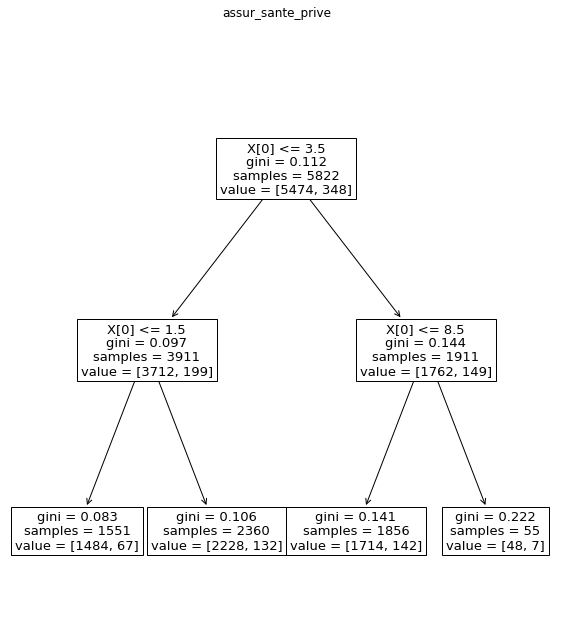

In [19]:
#assur_sante_prive

print(X['assur_sante_prive'].value_counts())

arbre_cla_assur_sante_prive=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_assur_sante_prive.fit(X_new[:,18].reshape(X_new.shape[0],1),varexpliquee)
assur_sante_prive_cla=np.repeat(-1,X_new.shape[0])
assur_sante_prive_cla[X_new[:,18]<=1.5]=0
assur_sante_prive_cla[(X_new[:,18]>1.5) & (X_new[:,18]<=3.5)]=1
assur_sante_prive_cla[(X_new[:,18]>3.5) & (X_new[:,18]<=8.5)]=2
assur_sante_prive_cla[X_new[:,18]>8.5]=3

print(assur_sante_prive_cla)


for i in range(0,5822):
    X.at[i,'assur_sante_prive'] = assur_sante_prive_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[18])
plot_tree(arbre_cla_assur_sante_prive) 

print(X['assur_sante_prive'].value_counts())

2    1439
3    1109
1     980
0     968
4     772
5     331
6     122
7      66
9      26
8       9
Name: PCSouvr, dtype: int64
[2 3 2 ... 3 2 3]
3    2435
2    1439
1     980
0     968
Name: PCSouvr, dtype: int64


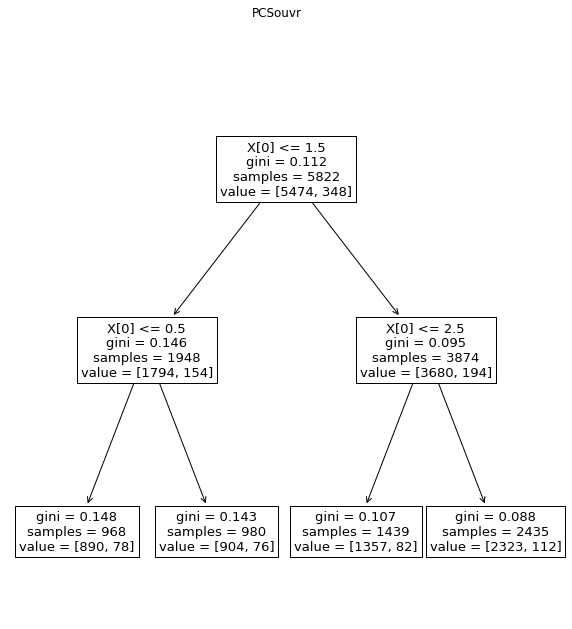

In [20]:
#PCSouvr

print(X['PCSouvr'].value_counts())

arbre_cla_PCSouvr=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_PCSouvr.fit(X_new[:,19].reshape(X_new.shape[0],1),varexpliquee)
PCSouvr_cla=np.repeat(-1,X_new.shape[0])
PCSouvr_cla[X_new[:,19]<=0.5]=0
PCSouvr_cla[(X_new[:,19]>0.5) & (X_new[:,19]<=1.5)]=1
PCSouvr_cla[(X_new[:,19]>1.5) & (X_new[:,19]<=2.5)]=2
PCSouvr_cla[X_new[:,19]>2.5]=3

print(PCSouvr_cla)


for i in range(0,5822):
    X.at[i,'PCSouvr'] = PCSouvr_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[19])
plot_tree(arbre_cla_PCSouvr) 

print(X['PCSouvr'].value_counts())

0    4176
1     854
2     487
3     143
4      77
5      59
6      14
8       5
9       4
7       3
Name: PCSagri, dtype: int64
[1 0 0 ... 0 0 1]
0    4176
1    1484
2     162
Name: PCSagri, dtype: int64


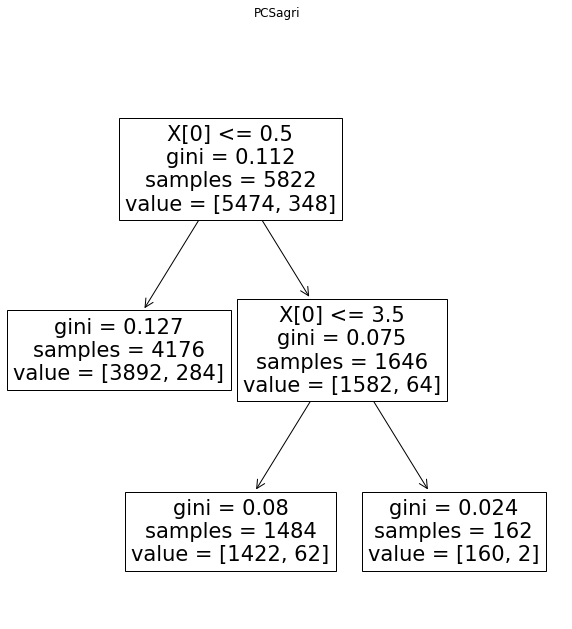

In [21]:
#PCSagri

print(X['PCSagri'].value_counts())

arbre_cla_PCSagri=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_PCSagri.fit(X_new[:,20].reshape(X_new.shape[0],1),varexpliquee)
PCSagri_cla=np.repeat(-1,X_new.shape[0])
PCSagri_cla[X_new[:,20]<=0.5]=0
PCSagri_cla[(X_new[:,20]>0.5) & (X_new[:,20]<=3.5)]=1
PCSagri_cla[X_new[:,20]>3.5]=2

print(PCSagri_cla)


for i in range(0,5822):
    X.at[i,'PCSagri'] = PCSagri_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[20])
plot_tree(arbre_cla_PCSagri) 

print(X['PCSagri'].value_counts())

0    1757
2    1247
1     951
3     848
4     519
5     259
6     127
7      67
8      24
9      23
Name: celibataire, dtype: int64
[0 0 2 ... 2 0 0]
0    2708
2    1626
1    1247
3     241
Name: celibataire, dtype: int64


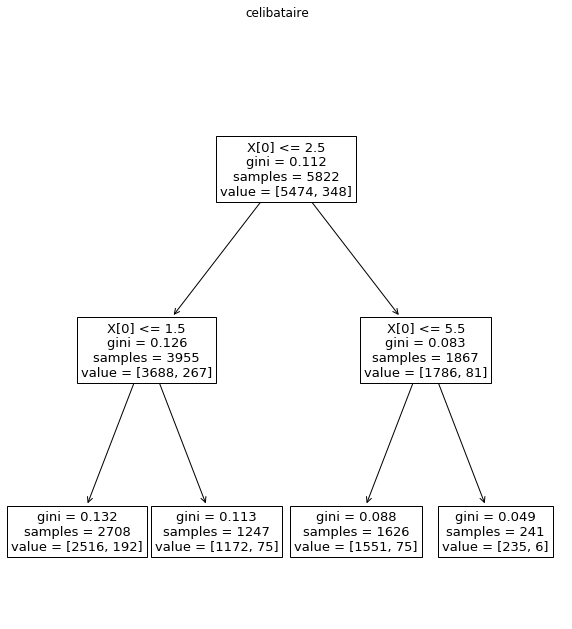

In [22]:
#celibataire

print(X['celibataire'].value_counts())

arbre_cla_celibataire=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_celibataire.fit(X_new[:,21].reshape(X_new.shape[0],1),varexpliquee)
celibataire_cla=np.repeat(-1,X_new.shape[0])
celibataire_cla[X_new[:,21]<=1.5]=0
celibataire_cla[(X_new[:,21]>1.5) & (X_new[:,21]<=2.5)]=1
celibataire_cla[(X_new[:,21]>2.5) & (X_new[:,21]<=5.5)]=2
celibataire_cla[X_new[:,21]>5.5]=3

print(celibataire_cla)


for i in range(0,5822):
    X.at[i,'celibataire'] = celibataire_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[21])
plot_tree(arbre_cla_celibataire) 

print(X['celibataire'].value_counts())

2    1491
3    1394
4     953
0     667
5     431
1     403
6     211
7     178
9      80
8      14
Name: PCSinter, dtype: int64
[2 3 3 ... 2 2 2]
2    3288
3    1867
0     667
Name: PCSinter, dtype: int64


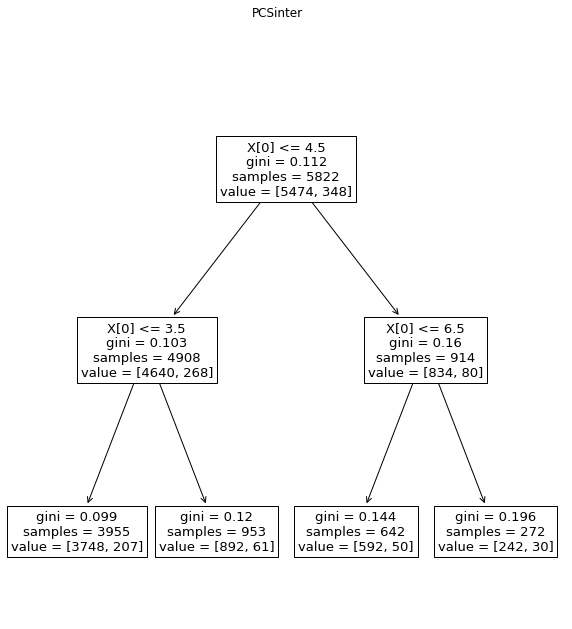

In [23]:
#PCSinter

print(X['PCSinter'].value_counts())

arbre_cla_PCSinter=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_PCSinter.fit(X_new[:,22].reshape(X_new.shape[0],1),varexpliquee)
PCSinter_cla=np.repeat(-1,X_new.shape[0])
PCSinter_cla[X_new[:,22]<=0.5]=0
PCSinter_cla[(X_new[:,22]>0.5) & (X_new[:,22]<=3.5)]=1
PCSinter_cla[(X_new[:,22]>0.5) & (X_new[:,22]<=3.5)]=2
PCSinter_cla[X_new[:,22]>3.5]=3

print(PCSinter_cla)


for i in range(0,5822):
    X.at[i,'PCSinter'] = PCSinter_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[22])
plot_tree(arbre_cla_PCSinter) 

print(X['PCSinter'].value_counts())

0    5426
3     282
4      63
2      34
5      16
6       1
Name: mt_cyclomoteur, dtype: int64
[0 0 0 ... 0 0 0]
0    5426
1     316
2      80
Name: mt_cyclomoteur, dtype: int64


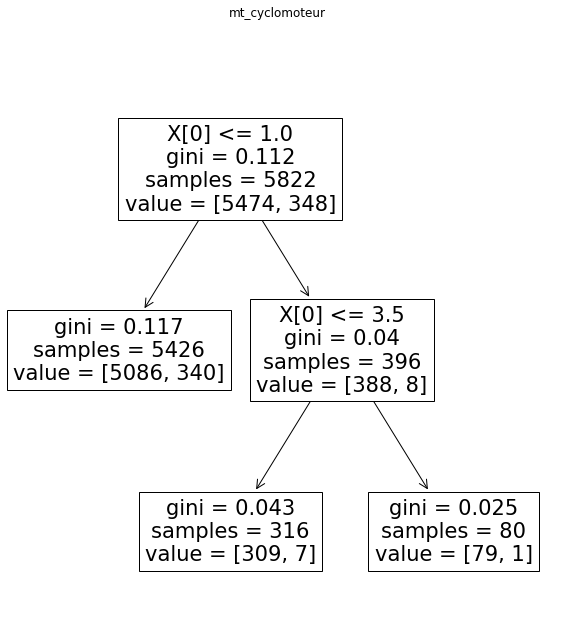

In [24]:
#mt_cyclomoteur

print(X['mt_cyclomoteur'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,23].reshape(X_new.shape[0],1),varexpliquee)
mtcy_cla=np.repeat(-1,X_new.shape[0])
mtcy_cla[X_new[:,23]<=1.0]=0
mtcy_cla[(X_new[:,23]>1.0) & (X_new[:,23]<=3.5)]=1
mtcy_cla[(X_new[:,23]>3.5)]=2

print(mtcy_cla)

for i in range(0,5822):
    X.at[i,'mt_cyclomoteur'] = mtcy_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[23])
plot_tree(arbre_cla_r1) 

print(X['mt_cyclomoteur'].value_counts())

2    1382
3    1167
0    1167
1     921
4     604
5     310
6     169
7      68
8      24
9      10
Name: PCSouvr_quali, dtype: int64
[2 0 0 ... 2 2 1]
2    2250
0    2088
1    1382
3     102
Name: PCSouvr_quali, dtype: int64


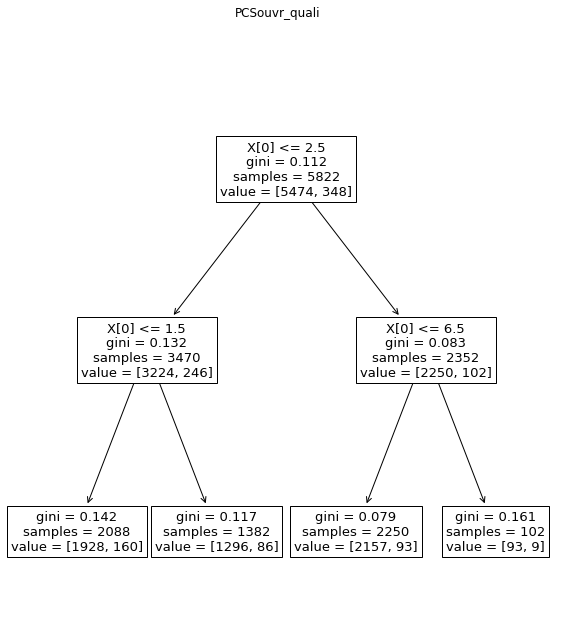

In [25]:
#PCSouvr_quali

print(X['PCSouvr_quali'].value_counts())

arbre_cla_PCSouvr_quali=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_PCSouvr_quali.fit(X_new[:,24].reshape(X_new.shape[0],1),varexpliquee)
PCSouvr_quali_cla=np.repeat(-1,X_new.shape[0])
PCSouvr_quali_cla[X_new[:,24]<=1.5]=0
PCSouvr_quali_cla[(X_new[:,24]>1.5) & (X_new[:,24]<=2.5)]=1
PCSouvr_quali_cla[(X_new[:,24]>2.5) & (X_new[:,24]<=6.5)]=2
PCSouvr_quali_cla[X_new[:,24]>6.5]=3

print(PCSouvr_quali_cla)


for i in range(0,5822):
    X.at[i,'PCSouvr_quali'] = PCSouvr_quali_cla[i]


fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[24])
plot_tree(arbre_cla_PCSouvr_quali) 

print(X['PCSouvr_quali'].value_counts())

3    1453
4    1334
2    1055
5     963
0     456
1     230
6     217
7     101
9       8
8       5
Name: sans_religion, dtype: int64
[2 3 3 ... 2 2 2]
3    2628
2    2508
0     456
1     230
Name: sans_religion, dtype: int64


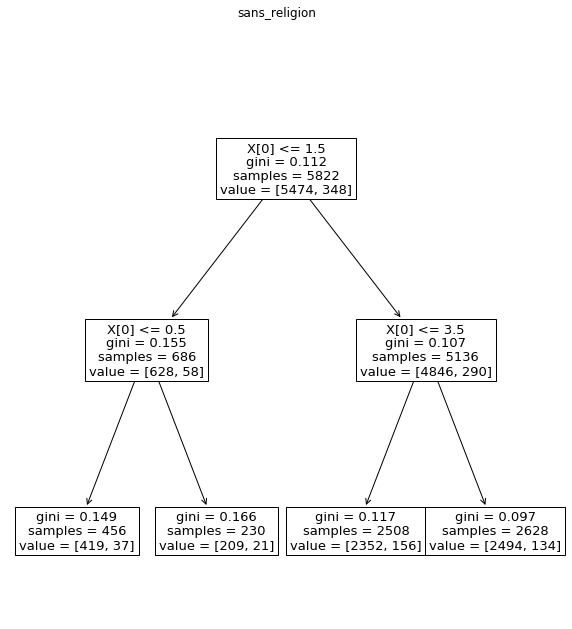

In [26]:
#sans_religion

print(X['sans_religion'].value_counts())

arbre_cla_sans_religion=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_sans_religion.fit(X_new[:,25].reshape(X_new.shape[0],1),varexpliquee)
sans_religion_cla=np.repeat(-1,X_new.shape[0])
sans_religion_cla[X_new[:,25]<=0.5]=0
sans_religion_cla[(X_new[:,25]>0.5) & (X_new[:,25]<=1.5)]=1
sans_religion_cla[(X_new[:,25]>1.5) & (X_new[:,25]<=3.5)]=2
sans_religion_cla[X_new[:,25]>3.5]=3

print(sans_religion_cla)


for i in range(0,5822):
    X.at[i,'sans_religion'] = sans_religion_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[25])
plot_tree(arbre_cla_sans_religion) 

print(X['sans_religion'].value_counts())

3    2646
2    2131
4     693
1     284
5      68
Name: nbpers_au_foyer, dtype: int64
[2 1 1 ... 2 2 2]
2    2646
1    2131
3     761
0     284
Name: nbpers_au_foyer, dtype: int64


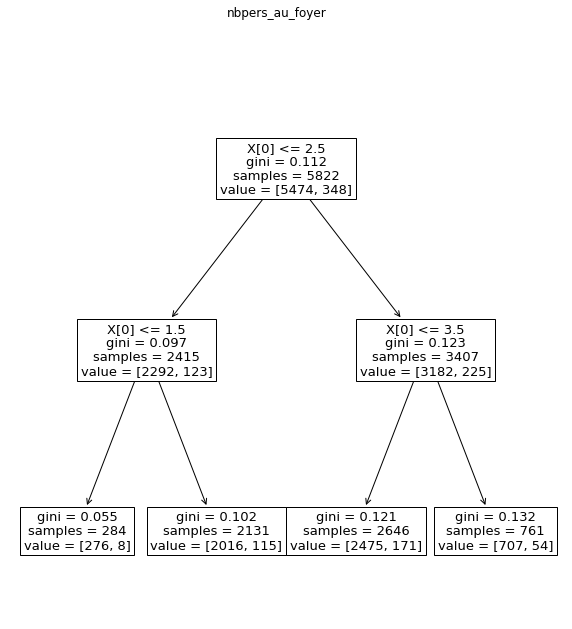

In [27]:
#nbpers_au_foyer

print(X['nbpers_au_foyer'].value_counts())

arbre_cla_nbpers_au_foyer=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_nbpers_au_foyer.fit(X_new[:,26].reshape(X_new.shape[0],1),varexpliquee)
nbpers_au_foyer_cla=np.repeat(-1,X_new.shape[0])
nbpers_au_foyer_cla[X_new[:,26]<=1.5]=0
nbpers_au_foyer_cla[(X_new[:,26]>1.5) & (X_new[:,26]<=2.5)]=1
nbpers_au_foyer_cla[(X_new[:,26]>2.5) & (X_new[:,26]<=3.5)]=2
nbpers_au_foyer_cla[X_new[:,26]>3.5]=3

print(nbpers_au_foyer_cla)


for i in range(0,5822):
    X.at[i,'nbpers_au_foyer'] = nbpers_au_foyer_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[26])
plot_tree(arbre_cla_nbpers_au_foyer) 

print(X['nbpers_au_foyer'].value_counts())

0    5784
1      38
Name: nb_accident_famil, dtype: int64
[0 0 0 ... 0 0 0]
0    5784
1      38
Name: nb_accident_famil, dtype: int64


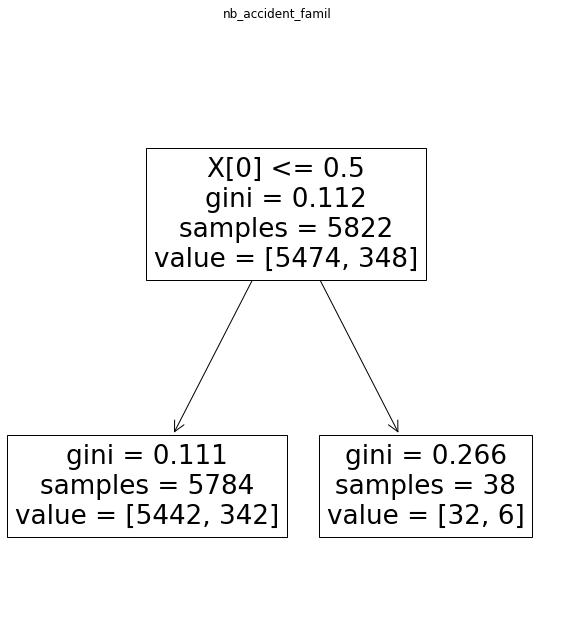

In [28]:
#nb_accident_famil

print(X['nb_accident_famil'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,27].reshape(X_new.shape[0],1),varexpliquee)
nb_accident_famil_cla=np.repeat(-1,X_new.shape[0])
nb_accident_famil_cla[X_new[:,27]<=0.5]=0
nb_accident_famil_cla[(X_new[:,27]>0.5)]=1

print(nb_accident_famil_cla)

for i in range(0,5822):
    X.at[i,'nb_accident_famil'] = nb_accident_famil_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[27])
plot_tree(arbre_cla_r1) 

print(X['nb_accident_famil'].value_counts())

0    2448
1    2030
2    1075
3     159
4      78
5      18
6      13
7       1
Name: concubin, dtype: int64
[0 1 1 ... 1 1 1]
1    3264
0    2448
2      78
3      32
Name: concubin, dtype: int64


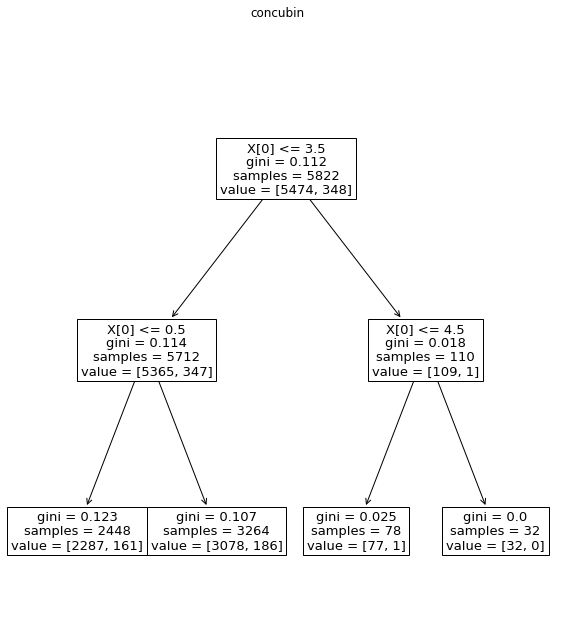

In [29]:
#concubin

print(X['concubin'].value_counts())

arbre_cla_concubin=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_concubin.fit(X_new[:,28].reshape(X_new.shape[0],1),varexpliquee)
concubin_cla=np.repeat(-1,X_new.shape[0])
concubin_cla[X_new[:,28]<=0.5]=0
concubin_cla[(X_new[:,28]>0.5) & (X_new[:,28]<=3.5)]=1
concubin_cla[(X_new[:,28]>3.5) & (X_new[:,28]<=4.5)]=2
concubin_cla[X_new[:,28]>4.5]=3

print(concubin_cla)

for i in range(0,5822):
    X.at[i,'concubin'] = concubin_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[28])
plot_tree(arbre_cla_concubin) 

print(X['concubin'].value_counts())

0    5675
1     147
Name: mt_velo, dtype: int64
[0 0 0 ... 0 0 0]
0    5675
1     147
Name: mt_velo, dtype: int64


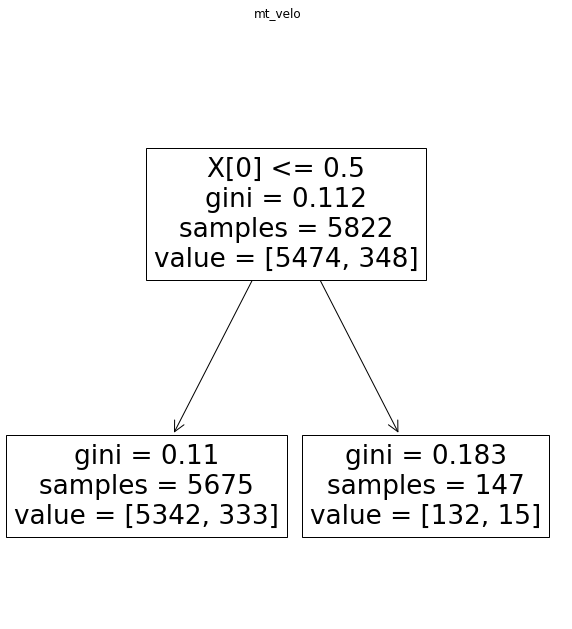

In [30]:
# mt_velo

print(X['mt_velo'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,29].reshape(X_new.shape[0],1),varexpliquee)
mt_velo_cla=np.repeat(-1,X_new.shape[0])
mt_velo_cla[X_new[:,29]<=0.5]=0
mt_velo_cla[(X_new[:,29]>0.5)]=1

print(mt_velo_cla)

for i in range(0,5822):
    X.at[i,'mt_velo'] = mt_velo_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[29])
plot_tree(arbre_cla_r1) 

print(X['mt_velo'].value_counts())

0    5799
1      19
2       4
Name: nb_invalidite, dtype: int64
[0 0 0 ... 0 0 0]
0    5799
1      23
Name: nb_invalidite, dtype: int64


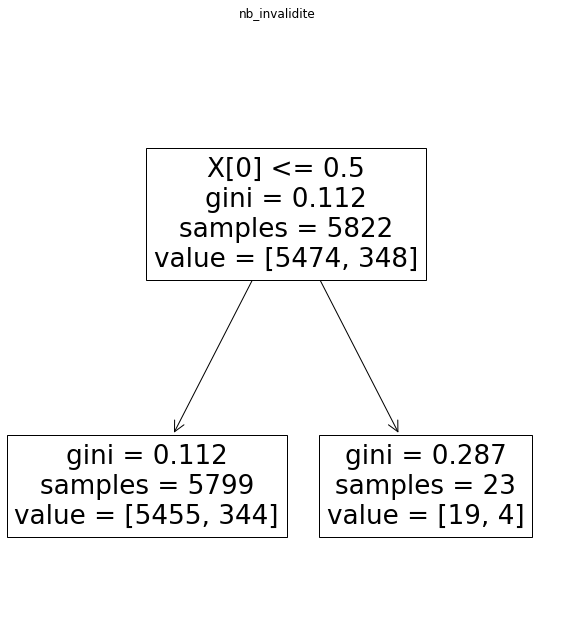

In [31]:
#nb_invalidite

print(X['nb_invalidite'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,30].reshape(X_new.shape[0],1),varexpliquee)
nbi_cla=np.repeat(-1,X_new.shape[0])
nbi_cla[X_new[:,30]<=0.5]=0
nbi_cla[(X_new[:,30]>0.5)]=1

print(nbi_cla)

for i in range(0,5822):
    X.at[i,'nb_invalidite'] = nbi_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[30])
plot_tree(arbre_cla_r1) 

print(X['nb_invalidite'].value_counts())

0    4171
1    1202
2     348
5      52
3      37
4      12
Name: PCScadre, dtype: int64
[0 0 0 ... 0 2 0]
0    4171
1    1202
2     449
Name: PCScadre, dtype: int64


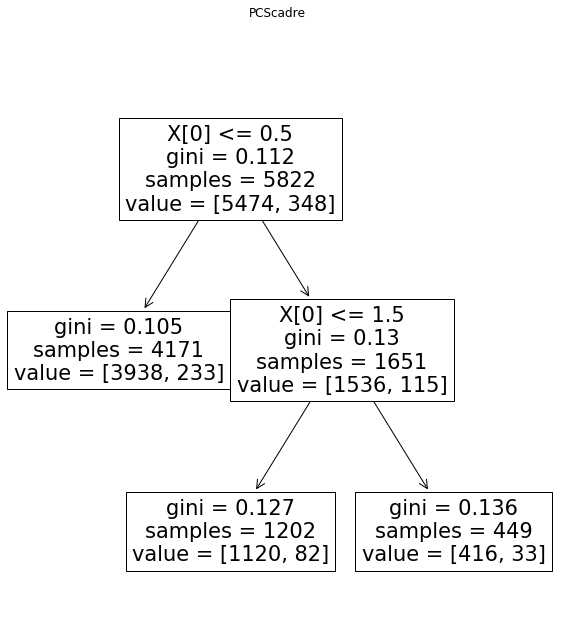

In [32]:
#PCScadre

print(X['PCScadre'].value_counts())

arbre_cla_PCScadre=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_PCScadre.fit(X_new[:,31].reshape(X_new.shape[0],1),varexpliquee)
PCScadre_cla=np.repeat(-1,X_new.shape[0])
PCScadre_cla[X_new[:,31]<=0.5]=0
PCScadre_cla[(X_new[:,31]>0.5) & (X_new[:,31]<=1.5)]=1
PCScadre_cla[X_new[:,31]>1.5]=2

print(PCScadre_cla)


for i in range(0,5822):
    X.at[i,'PCScadre'] = PCScadre_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[31])
plot_tree(arbre_cla_PCScadre) 

print(X['PCScadre'].value_counts())

0    5702
1     120
Name: nb_RC_agri, dtype: int64
[0 0 0 ... 0 0 0]
0    5702
1     120
Name: nb_RC_agri, dtype: int64


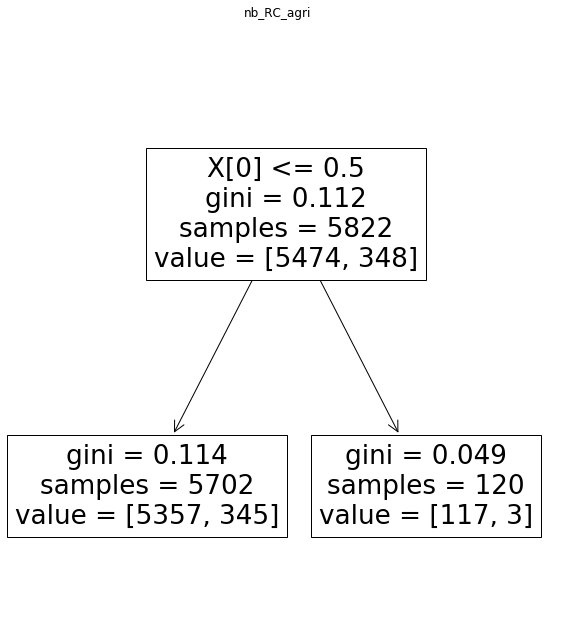

In [33]:
#nb_RC_agri

print(X['nb_RC_agri'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,32].reshape(X_new.shape[0],1),varexpliquee)
nbRa_cla=np.repeat(-1,X_new.shape[0])
nbRa_cla[X_new[:,32]<=0.5]=0
nbRa_cla[(X_new[:,32]>0.5)]=1

print(nbRa_cla)

for i in range(0,5822):
    X.at[i,'nb_RC_agri'] = nbRa_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[32])
plot_tree(arbre_cla_r1) 

print(X['nb_RC_agri'].value_counts())

0    5529
4      94
3      84
6      38
5      35
2      28
1       9
7       3
9       1
8       1
Name: mt_assur_vie, dtype: int64
[0 0 0 ... 0 0 0]
0    5566
2     129
1      84
3      43
Name: mt_assur_vie, dtype: int64


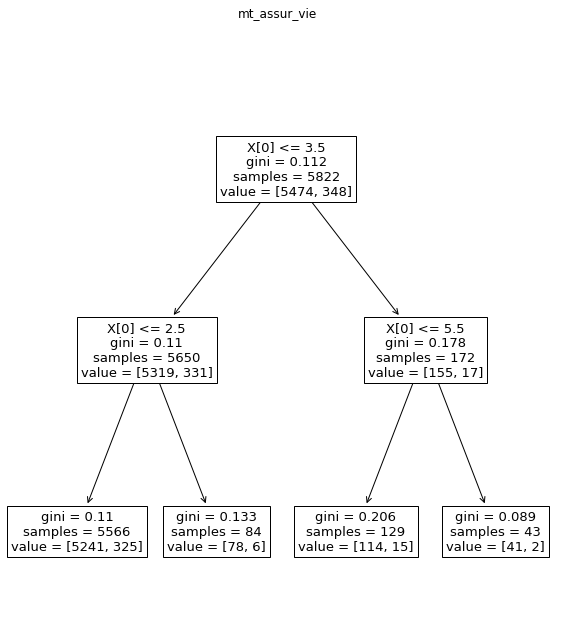

In [34]:
#mt_assur_vie

print(X['mt_assur_vie'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,33].reshape(X_new.shape[0],1),varexpliquee)
mtav_cla=np.repeat(-1,X_new.shape[0])
mtav_cla[X_new[:,33]<=2.5]=0
mtav_cla[(X_new[:,33]>2.5) & (X_new[:,33]<=3.5)]=1
mtav_cla[(X_new[:,33]>3.5) & (X_new[:,33]<=5.5)]=2
mtav_cla[(X_new[:,33]>5.5)]=3

print(mtav_cla)

for i in range(0,5822):
    X.at[i,'mt_assur_vie'] = mtav_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[33])
plot_tree(arbre_cla_r1) 

print(X['mt_assur_vie'].value_counts())

0    5777
1      44
2       1
Name: nb_MRH, dtype: int64
[0 0 0 ... 0 0 0]
0    5777
1      45
Name: nb_MRH, dtype: int64


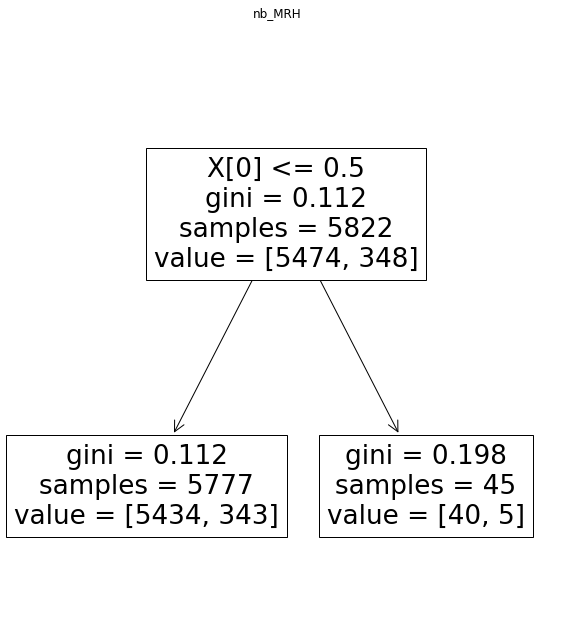

In [35]:
#nb_MRH

print(X['nb_MRH'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,34].reshape(X_new.shape[0],1),varexpliquee)
nbM_cla=np.repeat(-1,X_new.shape[0])
nbM_cla[X_new[:,34]<=0.5]=0
nbM_cla[(X_new[:,34]>0.5)]=1

print(nbM_cla)

for i in range(0,5822):
    X.at[i,'nb_MRH'] = nbM_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[34])
plot_tree(arbre_cla_r1) 

print(X['nb_MRH'].value_counts())

0    5757
2      38
1      19
3       6
5       1
4       1
Name: mt_remorque, dtype: int64
[0 0 0 ... 0 0 0]
0    5776
1      46
Name: mt_remorque, dtype: int64


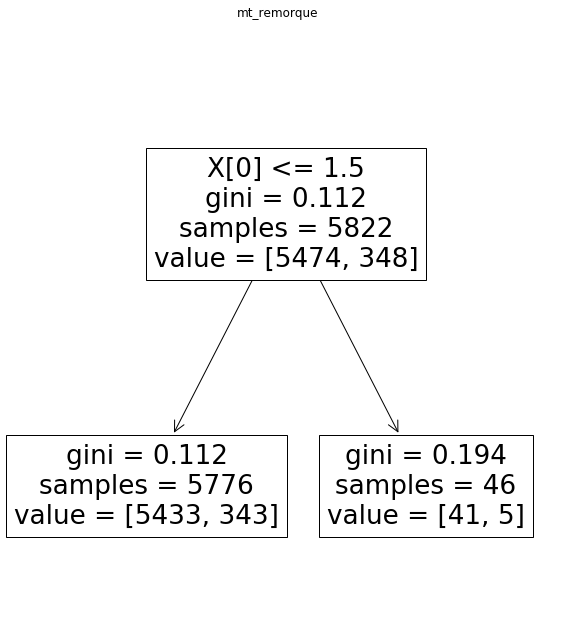

In [36]:
#mt_remorque

print(X['mt_remorque'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,35].reshape(X_new.shape[0],1),varexpliquee)
mtr_cla=np.repeat(-1,X_new.shape[0])
mtr_cla[X_new[:,35]<=1.5]=0
mtr_cla[(X_new[:,35]>1.5)]=1

print(mtr_cla)

for i in range(0,5822):
    X.at[i,'mt_remorque'] = mtr_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[35])
plot_tree(arbre_cla_r1) 

print(X['mt_remorque'].value_counts())

0    5679
3      79
5      28
4      27
6       9
Name: mt_tracteur, dtype: int64
[0 0 0 ... 0 0 0]
0    5679
1     106
2      37
Name: mt_tracteur, dtype: int64


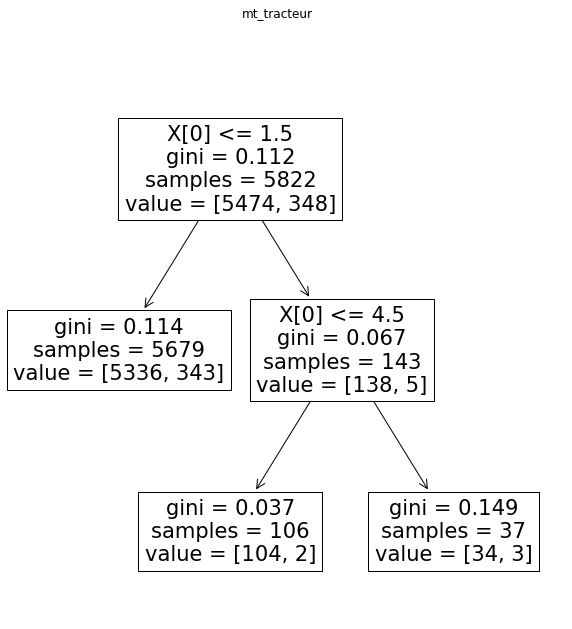

In [37]:
#mt_tracteur

print(X['mt_tracteur'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,36].reshape(X_new.shape[0],1),varexpliquee)
mtt_cla=np.repeat(-1,X_new.shape[0])
mtt_cla[X_new[:,36]<=1.5]=0
mtt_cla[(X_new[:,36]>1.5) & (X_new[:,36]<=4.5)]=1
mtt_cla[(X_new[:,36]>4.5)]=2

print(mtt_cla)

for i in range(0,5822):
    X.at[i,'mt_tracteur'] = mtt_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[36])
plot_tree(arbre_cla_r1) 

print(X['mt_tracteur'].value_counts())

1     5267
2      505
3       39
7        5
4        2
10       1
6        1
5        1
8        1
Name: nbmaisons, dtype: int64
[0 0 0 ... 0 0 0]
0    5267
1     505
2      50
Name: nbmaisons, dtype: int64


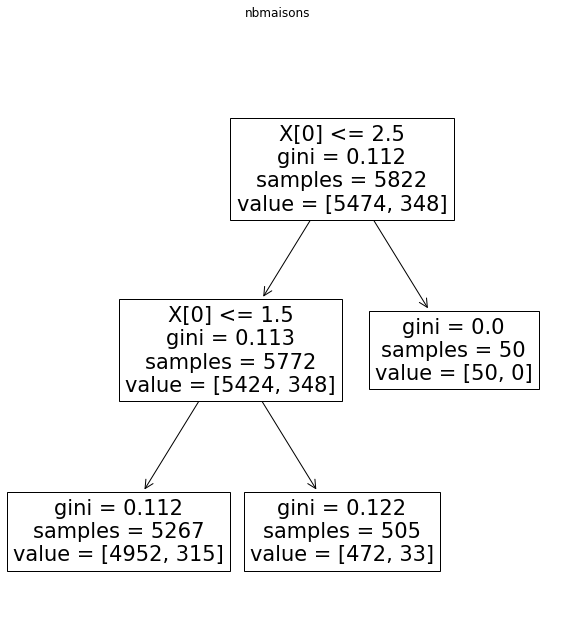

In [38]:
#nbmaisons

print(X['nbmaisons'].value_counts())

arbre_cla_nbmaisons=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_nbmaisons.fit(X_new[:,37].reshape(X_new.shape[0],1),varexpliquee)
nbmaisons_cla=np.repeat(-1,X_new.shape[0])
nbmaisons_cla[X_new[:,37]<=1.5]=0
nbmaisons_cla[(X_new[:,37]>1.5) & (X_new[:,37]<=2.5)]=1
nbmaisons_cla[X_new[:,37]>2.5]=2

print(nbmaisons_cla)

for i in range(0,5822):
    X.at[i,'nbmaisons'] = nbmaisons_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[37])
plot_tree(arbre_cla_nbmaisons) 

print(X['nbmaisons'].value_counts())

3    1498
4    1455
2    1060
5     606
1     372
0     371
6     321
7      96
9      29
8      14
Name: sans_enfant, dtype: int64
[0 0 0 ... 0 0 0]
0    4756
1     606
2     431
3      29
Name: sans_enfant, dtype: int64


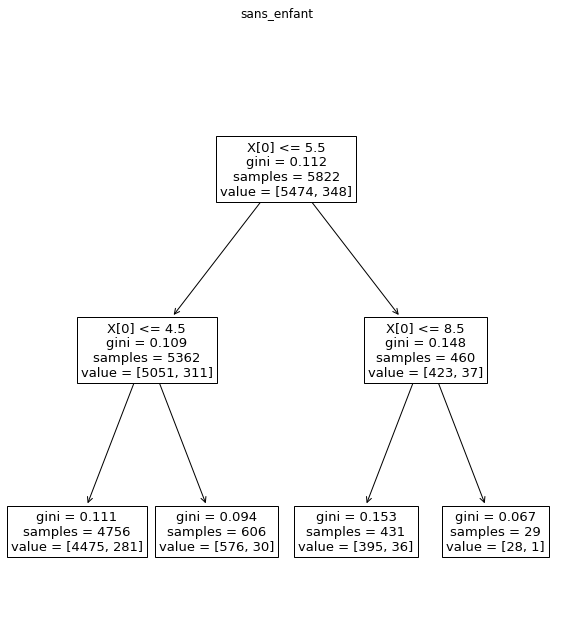

In [39]:
#sans_enfant

print(X['sans_enfant'].value_counts())

arbre_cla_sans_enfant=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_sans_enfant.fit(X_new[:,38].reshape(X_new.shape[0],1),varexpliquee)
sans_enfant_cla=np.repeat(-1,X_new.shape[0])
sans_enfant_cla[X_new[:,38]<=4.5]=0
sans_enfant_cla[(X_new[:,38]>4.5) & (X_new[:,38]<=5.5)]=1
sans_enfant_cla[(X_new[:,38]>5.5) & (X_new[:,38]<=8.5)]=2
sans_enfant_cla[X_new[:,38]>8.5]=3

print(sans_enfant_cla)

for i in range(0,5822):
    X.at[i,'sans_enfant'] = sans_enfant_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[38])
plot_tree(arbre_cla_sans_enfant) 

print(X['sans_enfant'].value_counts())

0    1854
2    1748
1    1468
3     385
4     301
5      56
6       9
7       1
Name: auto2, dtype: int64
[0 1 0 ... 0 3 2]
0    1854
2    1748
1    1468
3     752
Name: auto2, dtype: int64


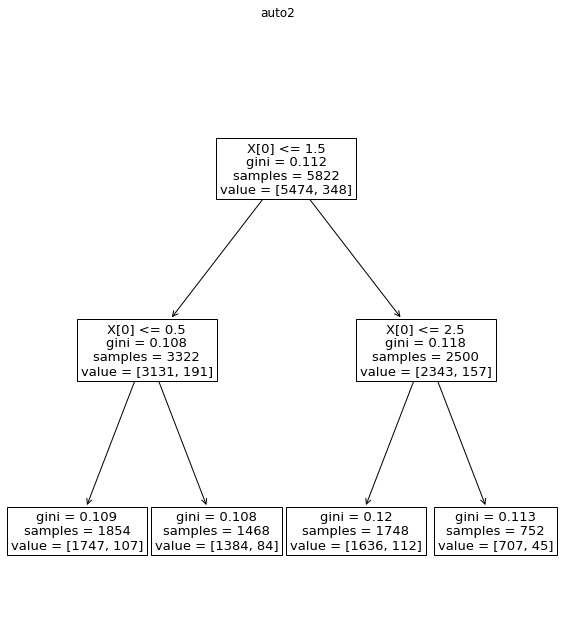

In [40]:
#auto2

print(X['auto2'].value_counts())

arbre_cla_auto2=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_auto2.fit(X_new[:,39].reshape(X_new.shape[0],1),varexpliquee)
auto2_cla=np.repeat(-1,X_new.shape[0])
auto2_cla[X_new[:,39]<=0.5]=0
auto2_cla[(X_new[:,39]>0.5) & (X_new[:,39]<=1.5)]=1
auto2_cla[(X_new[:,39]>1.5) & (X_new[:,39]<=2.5)]=2
auto2_cla[X_new[:,39]>2.5]=3

print(auto2_cla)

for i in range(0,5822):
    X.at[i,'auto2'] = auto2_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[39])
plot_tree(arbre_cla_auto2) 

print(X['auto2'].value_counts())

0    3228
1    1599
2     733
3     152
4      66
5      18
6      13
7       6
9       4
8       3
Name: catholique, dtype: int64
[0 1 0 ... 0 0 0]
0    3228
1    2332
2     262
Name: catholique, dtype: int64


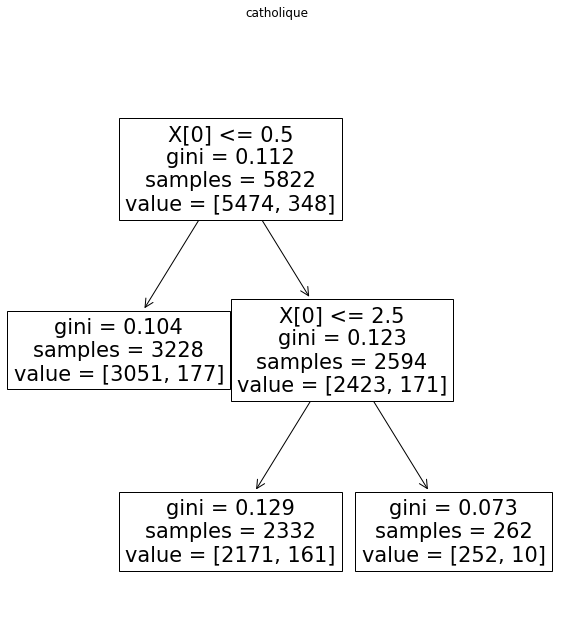

In [41]:
#catholique

print(X['catholique'].value_counts())

arbre_cla_catholique=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_catholique.fit(X_new[:,40].reshape(X_new.shape[0],1),varexpliquee)
catholique_cla=np.repeat(-1,X_new.shape[0])
catholique_cla[X_new[:,40]<=0.5]=0
catholique_cla[(X_new[:,40]>0.5) & (X_new[:,40]<=2.5)]=1
catholique_cla[X_new[:,40]>2.5]=2

print(catholique_cla)

for i in range(0,5822):
    X.at[i,'catholique'] = catholique_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[40])
plot_tree(arbre_cla_catholique) 

print(X['catholique'].value_counts())

0    5600
4     136
6      49
5      32
3       3
7       2
Name: mt_moto, dtype: int64
[0 0 0 ... 0 0 0]
0    5739
2      51
1      32
Name: mt_moto, dtype: int64


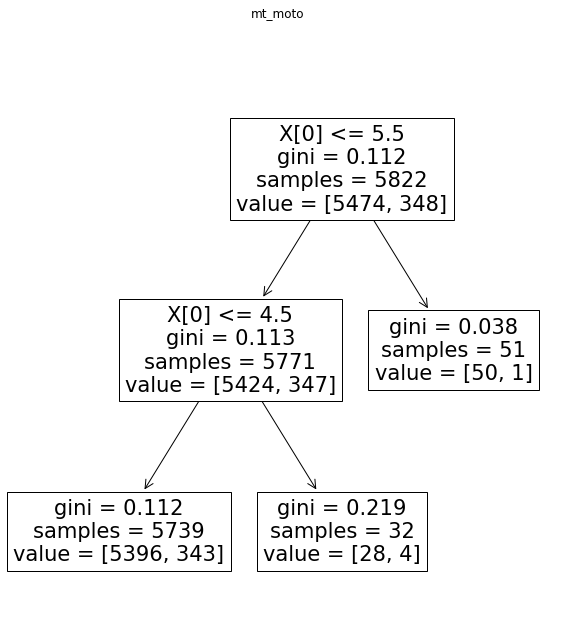

In [42]:
#mt_moto

print(X['mt_moto'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,41].reshape(X_new.shape[0],1),varexpliquee)
mtm_cla=np.repeat(-1,X_new.shape[0])
mtm_cla[X_new[:,41]<=4.5]=0
mtm_cla[(X_new[:,41]>4.5) & (X_new[:,41]<=5.5)]=1
mtm_cla[(X_new[:,41]>5.5)]=2

print(mtm_cla)

for i in range(0,5822):
    X.at[i,'mt_moto'] = mtm_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[41])
plot_tree(arbre_cla_r1) 

print(X['mt_moto'].value_counts())

1    2014
0    2003
2    1388
3     257
4     132
5      28
Name: autre_religion, dtype: int64
[1 1 2 ... 0 0 1]
1    2014
0    2003
2    1645
3     160
Name: autre_religion, dtype: int64


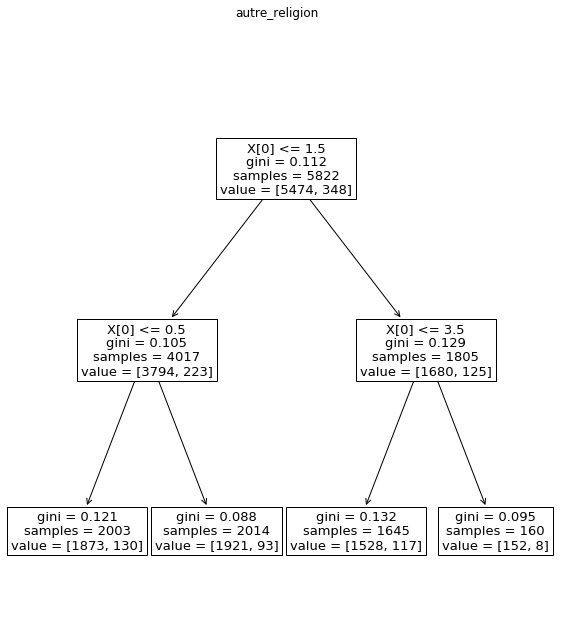

In [43]:
#autre_religion

print(X['autre_religion'].value_counts())

arbre_cla_autre_religion=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_autre_religion.fit(X_new[:,42].reshape(X_new.shape[0],1),varexpliquee)
autre_religion_cla=np.repeat(-1,X_new.shape[0])
autre_religion_cla[X_new[:,42]<=0.5]=0
autre_religion_cla[(X_new[:,42]>0.5) & (X_new[:,42]<=1.5)]=1
autre_religion_cla[(X_new[:,42]>1.5) & (X_new[:,42]<=3.5)]=2
autre_religion_cla[X_new[:,42]>3.5]=3

print(autre_religion_cla)

for i in range(0,5822):
    X.at[i,'autre_religion'] = autre_religion_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[42])
plot_tree(arbre_cla_autre_religion) 

print(X['autre_religion'].value_counts())

0    4900
1     763
2      96
3      36
4      24
7       1
9       1
5       1
Name: revenu5, dtype: int64
[0 0 0 ... 0 0 0]
0    4900
1     859
2      36
3      27
Name: revenu5, dtype: int64


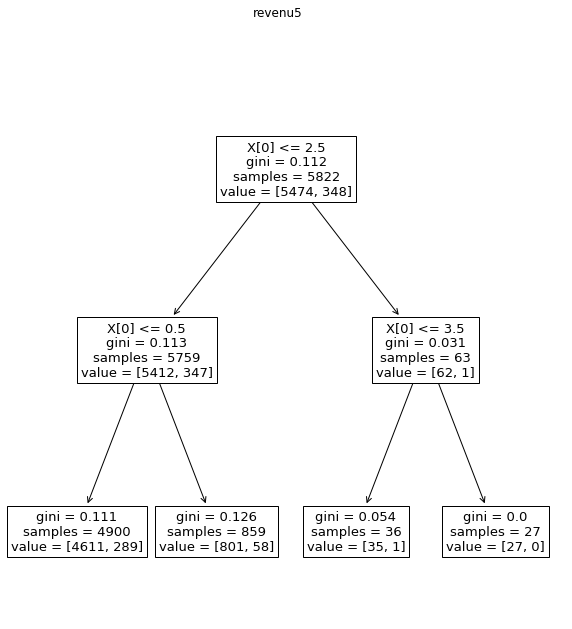

In [44]:
#revenu5

print(X['revenu5'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,43].reshape(X_new.shape[0],1),varexpliquee)
r5_cla=np.repeat(-1,X_new.shape[0])
r5_cla[X_new[:,43]<=0.5]=0
r5_cla[(X_new[:,43]>0.5) & (X_new[:,43]<=2.5)]=1
r5_cla[(X_new[:,43]>2.5) & (X_new[:,43]<=3.5)]=2
r5_cla[(X_new[:,43]>3.5)]=3

print(r5_cla)

for i in range(0,5822):
    X.at[i,'revenu5'] = r5_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[43])
plot_tree(arbre_cla_r1) 

print(X['revenu5'].value_counts())

4    1356
3    1147
5     931
2     919
0     465
6     406
1     268
7     205
9      90
8      35
Name: revenu2, dtype: int64
[0 0 1 ... 0 1 1]
0    4155
1    1577
2      90
Name: revenu2, dtype: int64


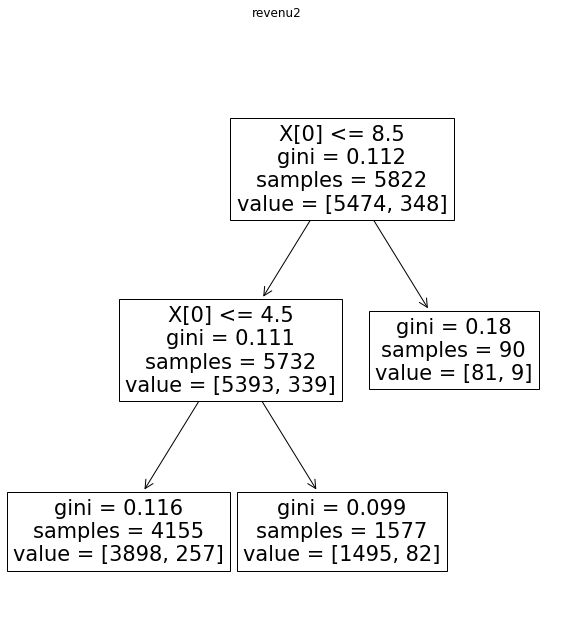

In [45]:
#revenu2

print(X['revenu2'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,44].reshape(X_new.shape[0],1),varexpliquee)
r2_cla=np.repeat(-1,X_new.shape[0])
r2_cla[X_new[:,44]<=4.5]=0
r2_cla[(X_new[:,44]>4.5) & (X_new[:,44]<=8.5)]=1
r2_cla[(X_new[:,44]>8.5)]=2

print(r2_cla)

for i in range(0,5822):
    X.at[i,'revenu2'] = r2_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[44])
plot_tree(arbre_cla_r1) 

print(X['revenu2'].value_counts())

0    5740
1      81
5       1
Name: nb_RC_entreprise, dtype: int64
[0 0 0 ... 0 0 0]
0    5740
1      82
Name: nb_RC_entreprise, dtype: int64


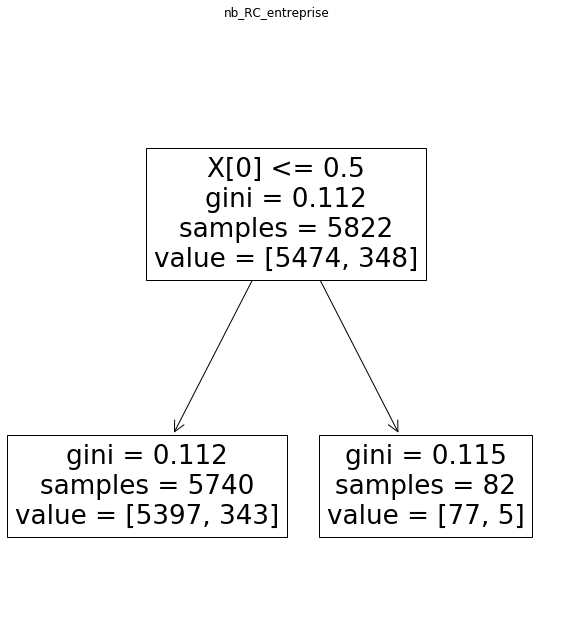

In [46]:
#nb_RC_entreprise

print(X['nb_RC_entreprise'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_r1.fit(X_new[:,45].reshape(X_new.shape[0],1),varexpliquee)
nbRe_cla=np.repeat(-1,X_new.shape[0])
nbRe_cla[X_new[:,45]<=0.5]=0
nbRe_cla[(X_new[:,45]>0.5)]=1

print(nbRe_cla)

for i in range(0,5822):
    X.at[i,'nb_RC_entreprise'] = nbRe_cla[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[45])
plot_tree(arbre_cla_r1) 

print(X['nb_RC_entreprise'].value_counts())

In [47]:
print(X)
print(B)

#Retraitement termine

      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           2          0      0              3            3          0   
1           0          0      2              4            1          0   
2           2          0      2              4            1          0   
3           2          0      0              4            1          0   
4           0          0      0              3            3          0   
...       ...        ...    ...            ...          ...        ...   
5817        2          0      2              3            2          0   
5818        0          0      0              5            3          0   
5819        2          0      2              3            2          0   
5820        2          0      0              6            0          0   
5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_etude_haut  revenu1  ...  mt_tracteur  \
0                7             2

[[2 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [2 0 2 ... 0 1 0]
 ...
 [2 0 2 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [2 0 2 ... 0 0 0]]
[0 0 0 ... 1 1 1]
(7471, 46)
(1868, 46)
(7471,)
(1868,)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did

{'C': 0.0359381366380464, 'penalty': 'l2', 'solver': 'liblinear'}
0.8618658814081114


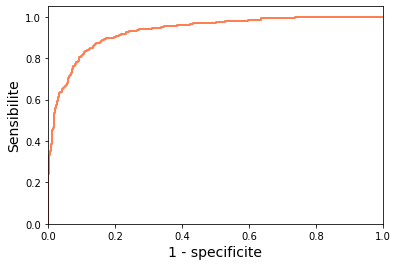

0.9309880405805688


D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


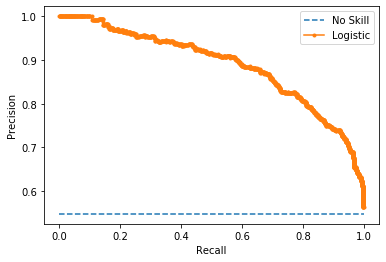

[[707 137]
 [115 909]]


precision
0.8690248565965584
rappel
0.8876953125
score f1
0.8782608695652174




In [55]:
#Regression logistique

#Over / Under sampling

#Resultat moyen
#from imblearn.over_sampling import SMOTE, ADASYN
#X_reglog, y_reglog = SMOTE().fit_resample(X, y)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_reglog, y_reglog = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_reglog, y_reglog = smote_tomek.fit_resample(X, y)

#Resultat moyen
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_reglog, y_reglog = smote_enn.fit_resample(X, y)

print(X_reglog)
print(y_reglog)

#On fait la separation
#On separe a ce niveau pour que toutes les donnes meme x_test soit traite

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_reglog, y_reglog, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


#Standardisation car Reg Log
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

#Preprocessing termine, la base est prete, elle est stocke dans X_train,X_test,Y_train,Y_test

#Regression Logistique

#model_rl = LogisticRegression(solver='liblinear', random_state=0)
#model_rl.fit(X_train_std,y_train)

#Construction d'une grille
parameters = {'penalty':['l1', 'l2'],'C':np.logspace(-10,1,10),'solver':['liblinear','saga']}

model = LogisticRegression()
grid_reg_log = model_selection.GridSearchCV(model,param_grid = parameters,scoring='accuracy')
model_rl = grid_reg_log.fit(X_train_std,y_train)
print(model_rl.best_params_)
print(model_rl.best_score_) #realise automatiquement par validation croisee

# Courbe Roc
y_pred_proba = model_rl.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
plt.show()

print(metrics.auc(fpr, tpr))


# precision-recall curve and f1
# predict probabilities
lr_probs = model_rl.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model_rl.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

#Mesure de performance

#Prediciton
pred = model_rl.predict(X_test_std)
# matrice de confusion

print(confusion_matrix(y_test,pred))
print()
print()
#precision
print("precision")
print(precision_score(y_test,pred))
#rappel
print("rappel")
print(recall_score(y_test,pred))
#f1 score
print("score f1")
print(f1_score(y_test,pred))
print()
print()

In [48]:
#Arbre de decision

#Over / Under sampling

#Resultat moyen
#from imblearn.over_sampling import SMOTE, ADASYN
#X_ad, y_ad = SMOTE().fit_resample(X, y)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_ad, y_ad = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_ad, y_ad = smote_tomek.fit_resample(X, y)

#Bon resultat
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_ad, y_ad = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_ad, y_ad, test_size=0.2)

# définition du modèle
tree= DecisionTreeClassifier(max_depth=9)
treeC=tree.fit(X_train, y_train)

# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

# Prévision de l'échantillon test
yChap = treeOpt.predict(X_test)
# matrice de confusion
print(confusion_matrix(y_test,yChap))

Meilleur score = 0.114309, Meilleur paramètre = {'max_depth': 9}
[[678 165]
 [ 31 994]]


C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The optimal parameters are {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.95
0.9470491533919787


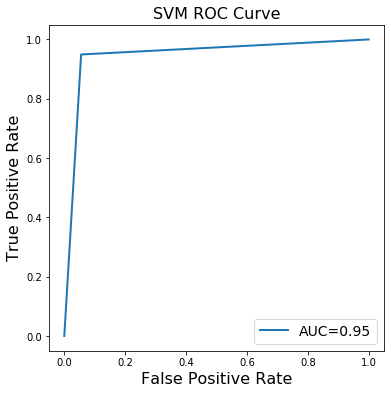

[[1042   61]
 [  55 1032]]


In [49]:
#SVM (2 à 5 minutes d'execution)

#Over / Under sampling

#Bon Resultat 
from imblearn.over_sampling import SMOTE, ADASYN
X_svm, y_svm = SMOTE().fit_resample(X, y)

#Separation jeu entrainement, test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_svm, y_svm, test_size=0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# Pour svm, on doit standardiser les donnes

# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# definir les hyperp parametres 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf','sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid) 
  
# on test le modele optimal
grille = grid.fit(X_train_std, y_train) 

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grille.best_params_, grid.best_score_))

# prédire sur le jeu de test avec le modèle optimisé
y_pred = grille.predict(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)
print(auc_cv)

# La courbe ROC
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='AUC=%.2f' % auc_cv)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

print(confusion_matrix(y_test, y_pred))

(7471, 46)
(1868, 46)
(7471,)
(1868,)
[[238 605]
 [ 30 995]]
0.663498862267434


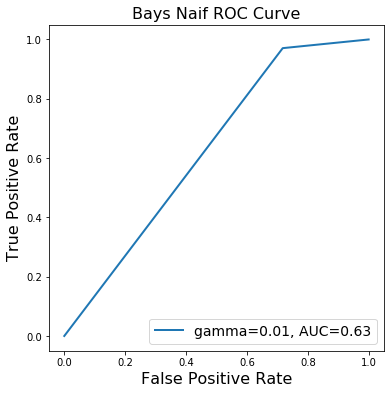

In [50]:
#Baysien naïf

#Over / Under sampling

#Resultat nul
#from imblearn.over_sampling import SMOTE, ADASYN
#X_bn, y_bn = SMOTE().fit_resample(X, y)

#Resultat catastrophique, cest de l aleatoire
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_bn, y_bn = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_bn, y_bn = smote_tomek.fit_resample(X, y)

#Resultat moyen
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_bn, y_bn = smote_enn.fit_resample(X, y)


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_bn, y_bn, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)
gnb.score(X_train_std,y_train)

y_pred = gnb.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))

print(gnb.score(X_train_std,y_train))

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Bays Naif ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

Train on 3725 samples, validate on 932 samples
Epoch 1/22
3725/3725 [==============================] - 2s 512us/sample - loss: 0.3337 - accuracy: 0.9047 - val_loss: 0.2642 - val_accuracy: 0.9410
Epoch 2/22
3725/3725 [==============================] - 0s 128us/sample - loss: 0.2464 - accuracy: 0.9385 - val_loss: 0.2451 - val_accuracy: 0.9410
Epoch 3/22
3725/3725 [==============================] - 1s 144us/sample - loss: 0.2329 - accuracy: 0.9385 - val_loss: 0.2323 - val_accuracy: 0.9410
Epoch 4/22
3725/3725 [==============================] - 0s 129us/sample - loss: 0.2234 - accuracy: 0.9385 - val_loss: 0.2242 - val_accuracy: 0.9410
Epoch 5/22
3725/3725 [==============================] - 0s 122us/sample - loss: 0.2168 - accuracy: 0.9385 - val_loss: 0.2205 - val_accuracy: 0.9410
Epoch 6/22
3725/3725 [==============================] - 0s 129us/sample - loss: 0.2113 - accuracy: 0.9385 - val_loss: 0.2197 - val_accuracy: 0.9410
Epoch 7/22
3725/3725 [==============================] - 0s 128us/

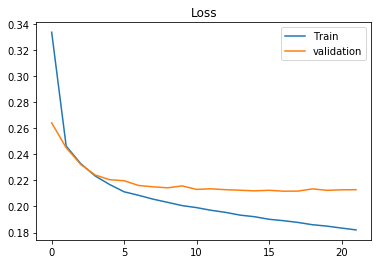

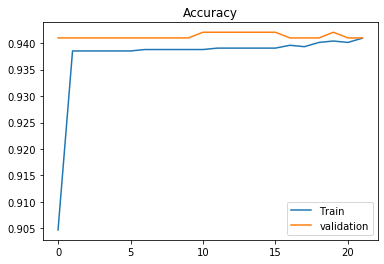

1165/1165 [==============================] - 0s 59us/sample - loss: 0.2131 - accuracy: 0.9373
(1165,)
(1165,)
[[1089   12]
 [  61    3]]


In [55]:
#Reseau de neurone

import tensorflow as tf

# Utilisation du package tensorflow à installer

#print(X)
#print(y)

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_rn, y_rn = smote_enn.fit_resample(X, y)


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2,random_state = 1)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(46, activation = "relu"))
model.add(tf.keras.layers.Dense(38, activation = "relu"))
model.add(tf.keras.layers.Dense(29, activation = "relu"))
model.add(tf.keras.layers.Dense(20, activation = "relu"))
model.add(tf.keras.layers.Dense(12, activation = "relu"))
model.add(tf.keras.layers.Dense(6, activation = "relu"))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

history= model.fit(X_train_std, y_train, epochs = 22,validation_split = 0.2)

model.summary()

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label = "Train")
plt.plot(loss_val_curve, label="validation")
plt.title("Loss")
plt.legend()
plt.show()

plt.plot(acc_curve, label = "Train")
plt.plot(acc_val_curve, label="validation")
plt.title("Accuracy")
plt.legend()
plt.show()

model.evaluate(X_test_std,y_test)

y_pred = model.predict(X_test_std)

L = []
for i in range(1165):
    if y_pred[i][0] > y_pred[i][1]:
        L.append(0)
    else:
        L.append(1)

print(y_test.shape)
y_pred_fin = np.array(L)
print(y_pred_fin.shape)
print(confusion_matrix(y_test, y_pred_fin))